In [1]:
import pandas as pd
from ogman import clean_columns
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import numpy as np
from branca.colormap import linear

In [2]:
df = pd.read_excel('../data/raw/Telco_customer_churn.xlsx')

TARGET - `Churn Value`:

Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

# EDA RAW & CLEANING

In [3]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
df.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [5]:
df.sample(n=5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
4432,6483-OATDN,1,United States,California,Monrovia,91016,"34.1528, -118.000482",34.152800,-118.000482,Male,...,Month-to-month,Yes,Credit card (automatic),51.30,411.6,No,0,66,2545,NaN
1925,2673-CXQEU,1,United States,California,Gardena,90247,"33.890853, -118.297967",33.890853,-118.297967,Female,...,One year,No,Electronic check,110.50,6139.5,No,0,21,4463,NaN
1003,2533-QVMSK,1,United States,California,March Air Reserve Base,92518,"33.888323, -117.277533",33.888323,-117.277533,Male,...,Two year,Yes,Electronic check,94.10,5638.3,Yes,1,71,6295,Competitor offered more data
2719,8807-ARQET,1,United States,California,Angels Camp,95222,"38.071327, -120.632221",38.071327,-120.632221,Female,...,Month-to-month,Yes,Electronic check,40.35,1677.85,No,0,79,2454,NaN
6618,4868-AADLV,1,United States,California,Durham,95938,"39.607831, -121.777959",39.607831,-121.777959,Male,...,One year,Yes,Electronic check,116.25,7862.25,No,0,31,4578,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [7]:
df.axes

[RangeIndex(start=0, stop=7043, step=1),
 Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
        'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
        'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
        'Multiple Lines', 'Internet Service', 'Online Security',
        'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
        'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
        'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
        'Churn Score', 'CLTV', 'Churn Reason'],
       dtype='object')]

Dedicate function (own) clean_columns to normalizes columns name

In [8]:
df = clean_columns(df)

In [9]:
df.axes

[RangeIndex(start=0, stop=7043, step=1),
 Index(['customer_id', 'count', 'country', 'state', 'city', 'zip_code',
        'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen',
        'partner', 'dependents', 'tenure_months', 'phone_service',
        'multiple_lines', 'internet_service', 'online_security',
        'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
        'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
        'monthly_charges', 'total_charges', 'churn_label', 'churn_value',
        'churn_score', 'cltv', 'churn_reason'],
       dtype='object')]

In [10]:
summary = (
    df.dtypes.astype(str).to_frame('dtype')
      .join(df.nunique(dropna=False).to_frame('nunique'))
      .join(df.isnull().sum().sort_values(ascending=False).to_frame('isnull'))
      .join((df.isnull().mean()*100).round(2).sort_values(ascending=False).to_frame('isnull [%]'))
      .join(df.apply(lambda x: x.duplicated(keep=False).sum()).to_frame('duplicates'))
      .join(df.apply(lambda x: (x.duplicated(keep=False).mean() * 100).round(2)).to_frame('duplicates [%]'))
)

summary

,dtype,nunique,isnull,isnull [%],duplicates,duplicates [%]
customer_id,object,7043,0,0.00,0,0.00
count,int64,1,0,0.00,7043,100.00
country,object,1,0,0.00,7043,100.00
state,object,1,0,0.00,7043,100.00
city,object,1129,0,0.00,7043,100.00
zip_code,int64,1652,0,0.00,7043,100.00
lat_long,object,1652,0,0.00,7043,100.00
latitude,float64,1652,0,0.00,7043,100.00
longitude,float64,1651,0,0.00,7043,100.00
gender,object,2,0,0.00,7043,100.00


In [11]:
df.dtypes.value_counts()

object     24
int64       6
float64     3
Name: count, dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
cols = ['count',
        'country',
        'state',
        'gender', 
        'senior_citizen', 
        'partner', 
        'dependents', 
        'phone_service', 
        'multiple_lines', 
        'internet_service', 
        'online_security', 
        'online_backup', 
        'device_protection', 
        'tech_support', 
        'streaming_tv', 
        'streaming_movies', 
        'contract', 
        'paperless_billing', 
        'payment_method',
        'churn_label',
        'churn_value']

uniques = {c: df[c].dropna().unique().tolist() for c in cols}
uniques

{'count': [1],
 'country': ['United States'],
 'state': ['California'],
 'gender': ['Male', 'Female'],
 'senior_citizen': ['No', 'Yes'],
 'partner': ['No', 'Yes'],
 'dependents': ['No', 'Yes'],
 'phone_service': ['Yes', 'No'],
 'multiple_lines': ['No', 'Yes', 'No phone service'],
 'internet_service': ['DSL', 'Fiber optic', 'No'],
 'online_security': ['Yes', 'No', 'No internet service'],
 'online_backup': ['Yes', 'No', 'No internet service'],
 'device_protection': ['No', 'Yes', 'No internet service'],
 'tech_support': ['No', 'Yes', 'No internet service'],
 'streaming_tv': ['No', 'Yes', 'No internet service'],
 'streaming_movies': ['No', 'Yes', 'No internet service'],
 'contract': ['Month-to-month', 'Two year', 'One year'],
 'paperless_billing': ['Yes', 'No'],
 'payment_method': ['Mailed check',
  'Electronic check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'churn_label': ['Yes', 'No'],
 'churn_value': [1, 0]}

### Missing values `in churn_reason`

In [14]:
df['churn_label'].value_counts()

churn_label
No     5174
Yes    1869
Name: count, dtype: int64

### Initial Observations Based on Data Types and Unique Values

- `churn_reason` contains missing values exclusively for non-churned customers, which is expected — no reason is recorded for retained clients.
- `churn_label` is a textual version of the target variable and will be dropped due to redundancy.
- `total_charges` is stored as object due to mixed formatting; it will be cast to float for numerical analysis.
- Several columns have only one unique value and therefore provide no information to the model:
  - `count`, `country`, `state` -> dropped due to zero variance.
- Features like `customerID`, `zip_code`, `lat_long`, `latitude`, `longitude` are numeric but represent identifiers or coordinates, they will be dropped as they are not structured for direct modeling use.
- Features with a small number of unique values (e.g. binary or low-cardinality categorical variables) will be treated as categorical and will be encoded later in the ML pipeline.
- Textual features such as `churn_reason` will not be used, as the current scope excludes NLP processing.
- No other columns contain missing values.

A final selection of relevant features for modeling will be provided at the end of the EDA phase.


In [15]:
df_clean = df.copy()

In [16]:
df_clean['total_charges'] = pd.to_numeric(df_clean['total_charges'], errors='coerce')

In [60]:
df_clean['total_charges'].isnull().sum()

np.int64(11)

That's why we have to check for nulls, because the ISNULL function doesn't recognize empty strings (''). But when we convert them into numbers, it turns out we actually have nulls!"

In [17]:
df_clean.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
count,7043.0,1.000,0.000,1.000,1.000,1.000,1.000,1.000
zip_code,7043.0,93521.965,1865.795,90001.000,92102.000,93552.000,95351.000,96161.000
latitude,7043.0,36.282,2.456,32.556,34.031,36.392,38.225,41.962
longitude,7043.0,-119.799,2.158,-124.301,-121.815,-119.731,-118.043,-114.193
tenure_months,7043.0,32.371,24.559,0.000,9.000,29.000,55.000,72.000
monthly_charges,7043.0,64.762,30.090,18.250,35.500,70.350,89.850,118.750
total_charges,7032.0,2283.300,2266.771,18.800,401.450,1397.475,3794.738,8684.800
churn_value,7043.0,0.265,0.442,0.000,0.000,0.000,1.000,1.000
churn_score,7043.0,58.699,21.525,5.000,40.000,61.000,75.000,100.000
cltv,7043.0,4400.296,1183.057,2003.000,3469.000,4527.000,5380.500,6500.000


# EDA MAIN

---
Now we want to find the relationship between the dependent variable (churn_value) and the independent variables (other features).
**target = 'churn_value'**

So the question is why clients left ? (according to the date) 

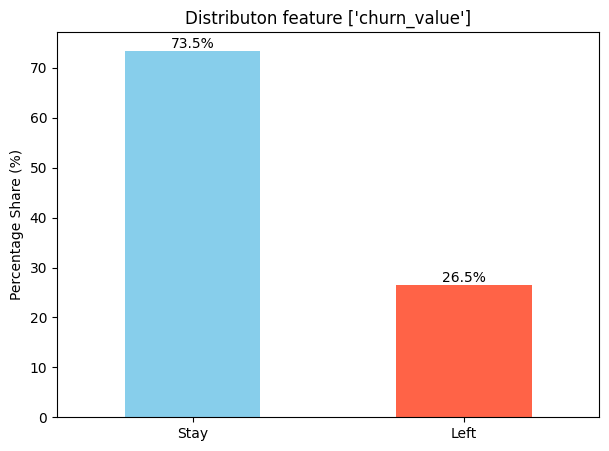

In [18]:
target = ['churn_value']
vc = df[target].value_counts()
pct_vc = (vc / vc.sum()) * 100

ax = pct_vc.plot(kind='bar', figsize=(7, 5), title=f'Distributon feature {target}', color=['skyblue', 'tomato'])

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10)

ax.set_xticklabels(['Stay', 'Left'], rotation=0)
plt.ylabel('Percentage Share (%)')
plt.xlabel('')

plt.show()

So accoding to data 26.5% of clients have left. Now we try to find the kind of customers are more likely to stop using our services. 

> ### Also we've got here unblamced data, notes it and deal with it in ML phrase

---
### Location
Does location affect churn ?

According to the table (summary) clients are from United States - California, from 1129 cities.

In [19]:
df_map = df_clean[['latitude', 'longitude', 'customer_id']].copy()

map_center = [df_map['latitude'].mean(), df_map['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=7, tiles="OpenStreetMap")

for _, row in df_map.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        fill=True, 
        fill_opacity=0.6,
        color='blue',
        popup=folium.Popup(f"Customer ID: {row['customer_id']}", max_width=250)
    ).add_to(m)

m.save('../reports/churn_map.html')
                    


It seems that location its nor important 

### Contract

Does contract type affect churn ?

In [20]:
df_clean['contract'].value_counts()

contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [21]:
contract_churn = df_clean.groupby('contract')['churn_value'].agg(
    customer_count = 'count',
    churners='sum', 
    churn_rate='mean'
).sort_values('churn_rate', ascending=False)

contract_churn['churn_rate'] = (contract_churn['churn_rate'] * 100).round(2)
contract_churn

,customer_count,churners,churn_rate
contract,,,
Month-to-month,3875,1655,42.71
One year,1473,166,11.27
Two year,1695,48,2.83


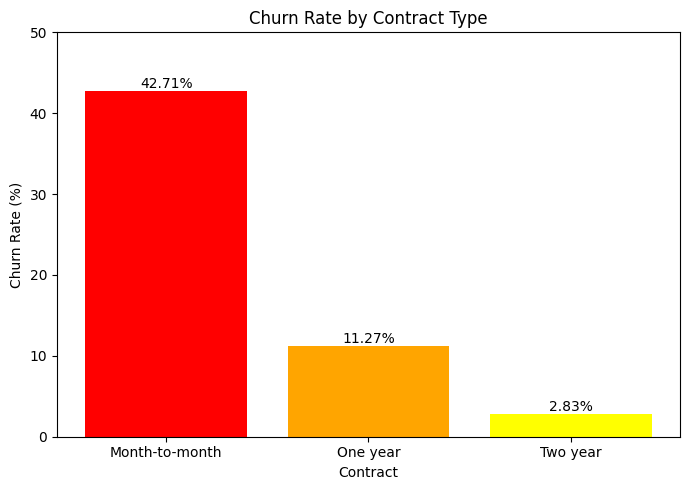

In [22]:
labels = contract_churn.index
values = contract_churn['churn_rate']

fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(labels, values, color=['red', 'orange', 'yellow'])

ax.bar_label(bars, fmt='%.2f%%')
ax.set_title("Churn Rate by Contract Type")
ax.set_ylabel("Churn Rate (%)")
ax.set_xlabel("Contract")
ax.set_ylim(0, 50)

plt.tight_layout()
plt.show()

- Customers with short contracts leave much more often.
- Long-term customers rarely cancel.

### Tenure (months)

We want to check how many clients leave in the first few months and how often that happens.
It can be used as supporting evidence


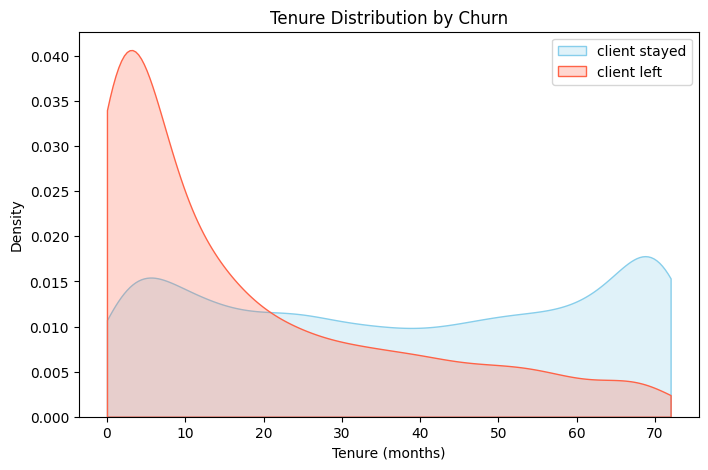

In [23]:
plt.figure(figsize=(8, 5))

sns.kdeplot(
    data=df_clean[df_clean['churn_value'] == 0],
    x='tenure_months',
    fill=True,
    color='skyblue',
    label='client stayed',
    clip=(0, 72)
)

sns.kdeplot(
    data=df_clean[df_clean['churn_value'] == 1],
    x='tenure_months',
    fill=True,
    color='tomato',
    label='client left',
    clip=(0, 72)
)

plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Density')
plt.legend()
plt.show()

- Clients who left usually had a short tenure — mainly below 10 months.
- Clients who stayed have a more even distribution, but we can see an increase in the 65–75-month range (older clients, maybe they get bored).

It just come to my mind that we can devide tenure into intervals - ML likes that

In [24]:
df_clean['tenure_bin'] = pd.cut(df_clean['tenure_months'], bins=4)
df_clean['tenure_bin'].cat.categories


IntervalIndex([(-0.072, 18.0], (18.0, 36.0], (36.0, 54.0], (54.0, 72.0]], dtype='interval[float64, right]')

In [25]:
df_clean['tenure_bin'].value_counts().sort_index()

tenure_bin
(-0.072, 18.0]    2734
(18.0, 36.0]      1308
(36.0, 54.0]      1182
(54.0, 72.0]      1819
Name: count, dtype: int64

In [26]:
churn_by_bin = df_clean.groupby('tenure_bin', observed=True)['churn_value'].agg(
    customers='count',
    churners='sum', 
    churn_rate='mean'
).sort_values('tenure_bin')
churn_by_bin['churn_rate'] = churn_by_bin['churn_rate'] * 100

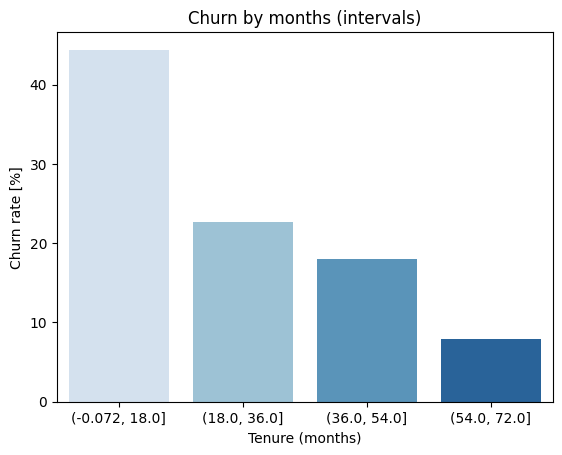

In [27]:
sns.barplot(
    data=churn_by_bin,
    x='tenure_bin',
    y='churn_rate',
    hue='tenure_bin',
    palette='Blues',
    legend=False
)
plt.ylabel('Churn rate [%]')
plt.xlabel('Tenure (months)')
plt.title ('Churn by months (intervals)')
plt.show()

Column `tenure_bin` added to data 

### Gender & Senior_citizen & Partner & Dependents (Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.)

In [28]:
gender = df_clean.groupby('gender')['churn_value'].agg(
    customers='count',
    churners='sum', 
    churn_rate='mean'
).sort_values('gender', ascending=True)

gender['churn_rate'] = (gender['churn_rate'] * 100).round(2)
gender

,customers,churners,churn_rate
gender,,,
Female,3488,939,26.92
Male,3555,930,26.16


>### Ye I know i should make a loop or function but i wanna see process. I'll add some new functions into my library. Next time I'll do it !

In [29]:
senior_citizen = df_clean.groupby('senior_citizen')['churn_value'].agg(
    customers='count',
    churners='sum', 
    churn_rate='mean'
).sort_values('senior_citizen')

senior_citizen['churn_rate'] = (senior_citizen['churn_rate'] * 100).round(2)
senior_citizen

,customers,churners,churn_rate
senior_citizen,,,
No,5901,1393,23.61
Yes,1142,476,41.68


In [30]:
partner = df_clean.groupby('partner')['churn_value'].agg(
    customers='count',
    churners='sum',
    churn_rate='mean'
).sort_values('partner')

partner['churn_rate'] = (partner['churn_rate'] * 100).round(2)
partner

,customers,churners,churn_rate
partner,,,
No,3641,1200,32.96
Yes,3402,669,19.66


In [31]:
dependents = df_clean.groupby('dependents')['churn_value'].agg(
    customers='count',
    churners='sum',
    churn_rate='mean'
).sort_values('dependents')

dependents['churn_rate'] = (dependents['churn_rate'] * 100).round(2)
dependents

,customers,churners,churn_rate
dependents,,,
No,5416,1763,32.55
Yes,1627,106,6.52


- Geneder doesn't matter 
- Older customers  are more likely to leave
- Single customers rarely leaves 
- Customers without dependents are much more likely to leave.
---

### Services used by the client
- Phone Service
- Multiple Lines
- Internet Service
- Online Security
- Online Backup
- Device Protection
- Tech Support
- Streaming TV
- Streaming Movies
---

### phone_service

In [32]:
phone_service = df_clean.groupby('phone_service')['churn_value'].agg(
    customer='count',
    churners='sum',
    churn_rate='mean',
).sort_values('phone_service')

phone_service['churn_rate'] = (phone_service['churn_rate'] * 100).round(2)
phone_service

,customer,churners,churn_rate
phone_service,,,
No,682,170,24.93
Yes,6361,1699,26.71


- Phone service doesnt matter
---
### multiple_lines

In [33]:
multiple_lines = df_clean.groupby('multiple_lines')['churn_value'].agg(
    customer='count',
    churners='sum',
    churn_rate='mean',
).sort_values('multiple_lines')

multiple_lines['churn_rate'] = (multiple_lines['churn_rate'] * 100).round(2)
multiple_lines

,customer,churners,churn_rate
multiple_lines,,,
No,3390,849,25.04
No phone service,682,170,24.93
Yes,2971,850,28.61


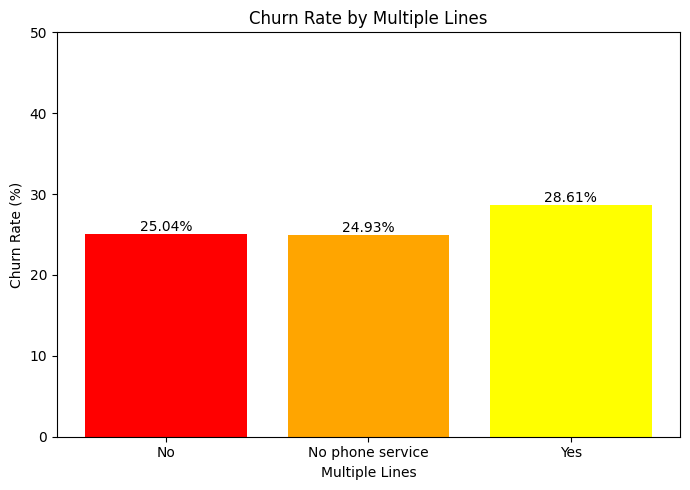

In [34]:
labels = multiple_lines.index
values = multiple_lines['churn_rate']

fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(labels, values, color=['red', 'orange', 'yellow'])

ax.bar_label(bars, fmt='%.2f%%')
ax.set_title("Churn Rate by Multiple Lines")
ax.set_ylabel("Churn Rate (%)")
ax.set_xlabel("Multiple Lines")
ax.set_ylim(0, 50)

plt.tight_layout()
plt.show()

### internet_service

In [35]:
internet_service = df_clean.groupby('internet_service')['churn_value'].agg(
    customer='count',
    churners='sum',
    churn_rate='mean',
).sort_values('internet_service')

internet_service['churn_rate'] = (internet_service['churn_rate'] * 100).round(2)
internet_service

,customer,churners,churn_rate
internet_service,,,
DSL,2421,459,18.96
Fiber optic,3096,1297,41.89
No,1526,113,7.40


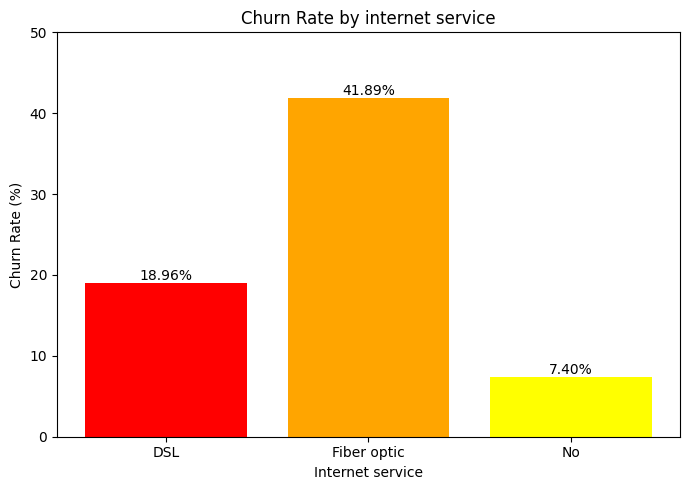

In [36]:
labels = internet_service.index
values = internet_service['churn_rate']

fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(labels, values, color=['red', 'orange', 'yellow'])
ax.bar_label(bars, fmt='%.2f%%')
ax.set_title("Churn Rate by internet service")
ax.set_ylabel("Churn Rate (%)")
ax.set_xlabel("Internet service")
ax.set_ylim(0, 50)

plt.tight_layout()
plt.show()



I google it and: 
- DSL: an older type of internet based on a telephone line, slower than fiber optic
- Fiber optic: modern fiber-optic internet, very fast

So, is strange that clinets churn fiber optic internet service more often than DLS

---

### online_security

In [37]:
online_security = df_clean.groupby('online_security')['churn_value'].agg(
    customer='count',
    churners='sum',
    churn_rate='mean',
).sort_values('online_security')

online_security['churn_rate'] = (online_security['churn_rate'] * 100).round(2)
online_security

,customer,churners,churn_rate
online_security,,,
No,3498,1461,41.77
No internet service,1526,113,7.40
Yes,2019,295,14.61


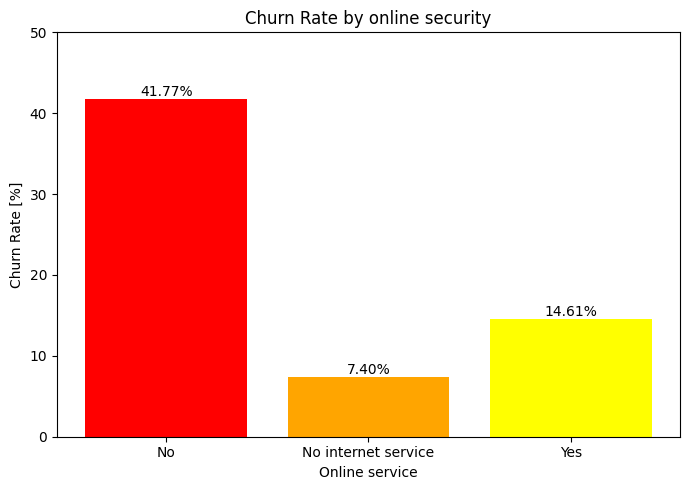

In [38]:
labels = online_security.index
values = online_security['churn_rate']

fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(labels, values, color=['red', 'orange', 'yellow'])
ax.bar_label(bars, fmt='%.2f%%')
ax.set_title('Churn Rate by online security')
ax.set_ylabel('Churn Rate [%]')
ax.set_xlabel('Online service')
ax.set_ylim(0, 50)

plt.tight_layout()
plt.show()


No online security strongly correlate with churn

---

### online_backup

In [39]:
online_backup = df_clean.groupby('online_backup')['churn_value'].agg(
    customer='count',
    churners='sum',
    churn_rate='mean'
).sort_values('online_backup')

online_backup['churn_rate'] = (online_backup['churn_rate'] * 100).round(2)
online_backup

,customer,churners,churn_rate
online_backup,,,
No,3088,1233,39.93
No internet service,1526,113,7.40
Yes,2429,523,21.53


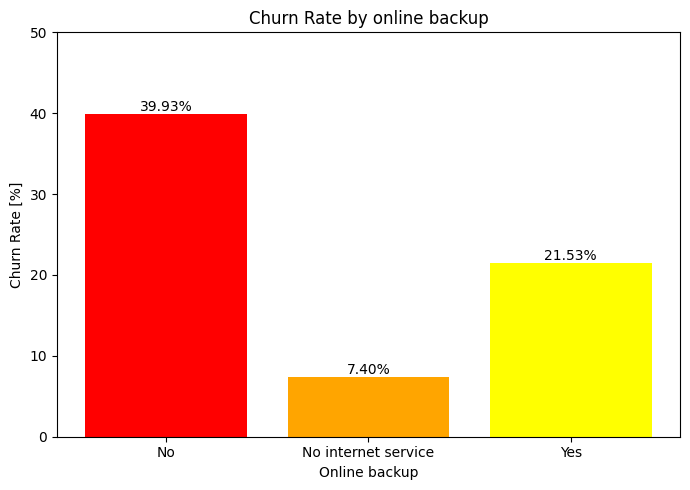

In [40]:
labels = online_backup.index
values = online_backup['churn_rate']

fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(labels, values, color=['red', 'orange', 'yellow'])
ax.bar_label(bars, fmt='%.2f%%')
ax.set_title('Churn Rate by online backup')
ax.set_ylabel('Churn Rate [%]')
ax.set_xlabel('Online backup')
ax.set_ylim(0, 50)

plt.tight_layout()
plt.show()


### device_protection

In [41]:
device_protection = df_clean.groupby('device_protection')['churn_value'].agg(
    customer='count',
    churners='sum',
    churn_rate='mean'
).sort_values('device_protection')

device_protection['churn_rate'] = (device_protection['churn_rate'] * 100).round(2)
device_protection

,customer,churners,churn_rate
device_protection,,,
No,3095,1211,39.13
No internet service,1526,113,7.40
Yes,2422,545,22.50


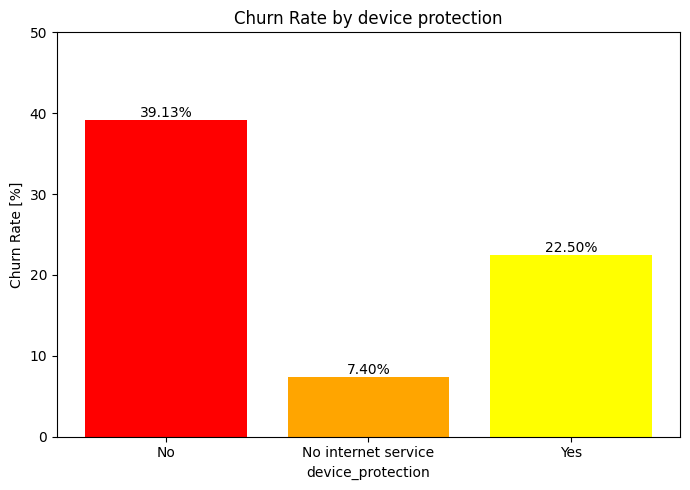

In [42]:
labels = device_protection.index
values = device_protection['churn_rate']

fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(labels, values, color=['red', 'orange', 'yellow'])
ax.bar_label(bars, fmt='%.2f%%')
ax.set_title('Churn Rate by device protection')
ax.set_ylabel('Churn Rate [%]')
ax.set_xlabel('device_protection')
ax.set_ylim(0, 50)

plt.tight_layout()
plt.show()

### tech_support

In [43]:
tech_support = df_clean.groupby('tech_support')['churn_value'].agg(
    customer='count',
    churners='sum',
    churn_rate='mean'
).sort_values('tech_support')

tech_support['churn_rate'] = (tech_support['churn_rate'] * 100).round(2)
tech_support

,customer,churners,churn_rate
tech_support,,,
No,3473,1446,41.64
No internet service,1526,113,7.40
Yes,2044,310,15.17


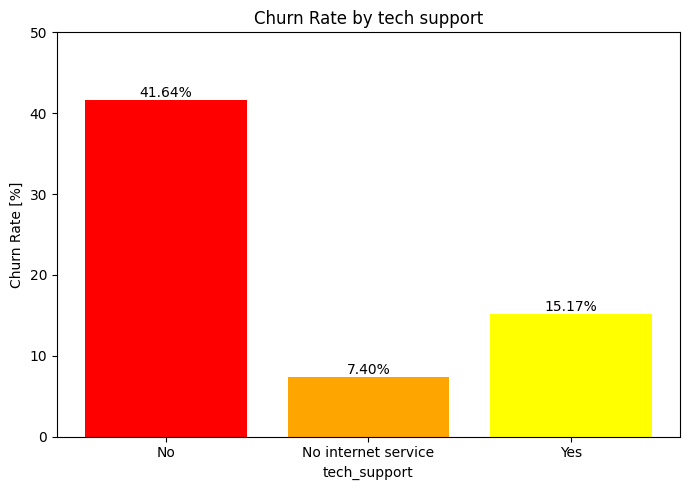

In [44]:
labels = tech_support.index
values = tech_support['churn_rate']

fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(labels, values, color=['red', 'orange', 'yellow'])
ax.bar_label(bars, fmt='%.2f%%')
ax.set_title('Churn Rate by tech support')
ax.set_ylabel('Churn Rate [%]')
ax.set_xlabel('tech_support')
ax.set_ylim(0, 50)

plt.tight_layout()
plt.show()

Customers who subscribe to multiple additional services (e.g., online security, technical support) tend to churn less. This may indicate that these customers are more satisfied with the service. In contrast, those who do not use such add-ons may cancel more easily or switch to a better offer.

---

### streaming_tv

In [45]:
streaming_tv = df_clean.groupby('streaming_tv')['churn_value'].agg(
    customer='count',
    churners='sum',
    churn_rate='mean'
).sort_values('streaming_tv')

streaming_tv['churn_rate'] = (streaming_tv['churn_rate'] * 100).round(2)
streaming_tv

,customer,churners,churn_rate
streaming_tv,,,
No,2810,942,33.52
No internet service,1526,113,7.40
Yes,2707,814,30.07


### streaming_movies

In [46]:
streaming_movies = df_clean.groupby('streaming_movies')['churn_value'].agg(
    customer='count',
    churners='sum',
    churn_rate='mean'
).sort_values('streaming_movies')

streaming_movies['churn_rate'] = (streaming_movies['churn_rate'] * 100).round(2)
streaming_movies

,customer,churners,churn_rate
streaming_movies,,,
No,2785,938,33.68
No internet service,1526,113,7.40
Yes,2732,818,29.94


The company doesn't charge an additional fee for streaming tv or movies 

---

### Now lets talk about payment methods

In [47]:
payment_method = df_clean.groupby('payment_method')['churn_value'].agg(
    customer='count',
    churners='sum',
    churn_rate='mean'
).sort_values('payment_method')

payment_method['churn_rate'] = (payment_method['churn_rate'] * 100).round(2)
payment_method

,customer,churners,churn_rate
payment_method,,,
Bank transfer (automatic),1544,258,16.71
Credit card (automatic),1522,232,15.24
Electronic check,2365,1071,45.29
Mailed check,1612,308,19.11


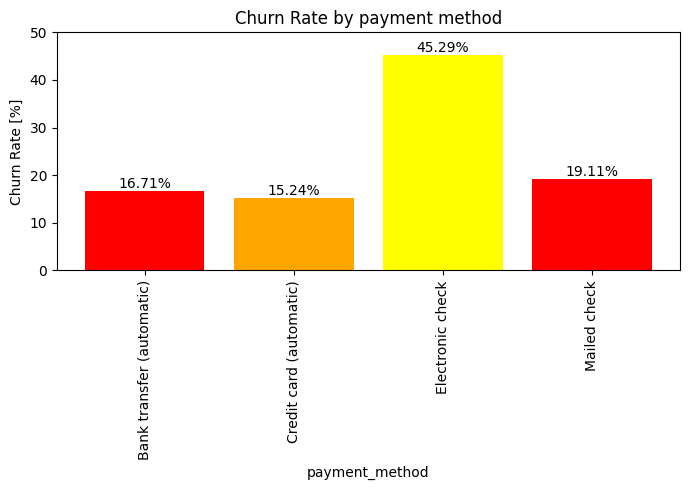

In [48]:
labels = payment_method.index
values = payment_method['churn_rate']

fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(labels, values, color=['red', 'orange', 'yellow'])

ax.bar_label(bars, fmt='%.2f%%')
ax.set_title('Churn Rate by payment method')
ax.set_ylabel('Churn Rate [%]')
ax.set_xlabel('payment_method')
ax.set_ylim(0, 50)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

- Customers paying via Electronic check have the highest churn rate – 45.29%.
- Customers using automatic payment methods (credit card / bank transfer) show a much lower churn rate (15–17%).

Customers with automatic payments tend to be more loyal, they don’t need to remember to pay manually, which reduces the likelihood of impulsive cancellation.

Those using Electronic checks may be less engaged or less committed to the service.

Additionally, customers with automatic payments might intend to cancel at some point but forget or postpone it, once the payment is processed automatically, they often decide to keep the service until the next billing cycle.

--- 

### cltv

<Axes: >

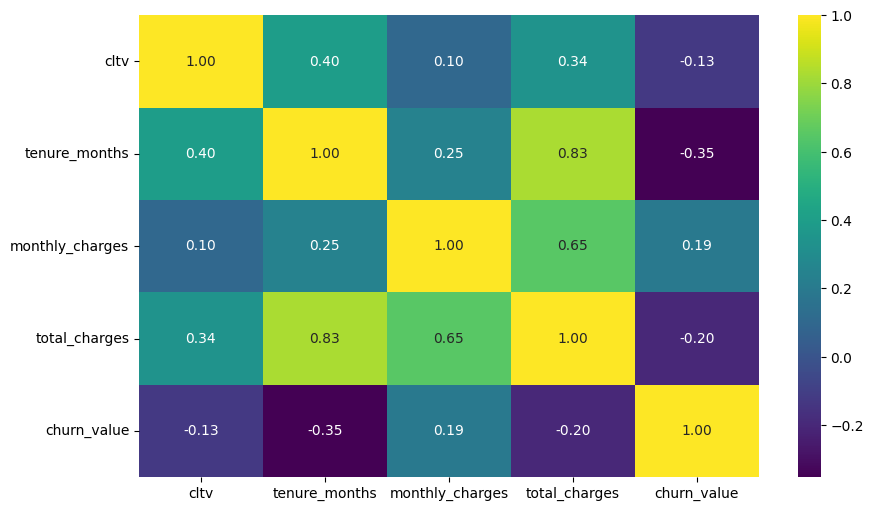

In [49]:
cltv = df_clean[['cltv', 'tenure_months', 'monthly_charges', 'total_charges', 'churn_value']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(cltv, annot=True, fmt=".2f", cmap='viridis')

Due to the description of CLTV as the "predicted customer value," we wanted to ensure that it is not simply a derivative of other variables such as tenure, monthly_charges, or total_charges.

Conclusions:
CLTV shows a moderate correlation with tenure and total_charges but is not strongly related to them (no correlation > 0.8). Therefore, we can assume that it is not a redundant variable and may contribute independent predictive value to the model. It remains as a numerical variable.

---

### churn_reason

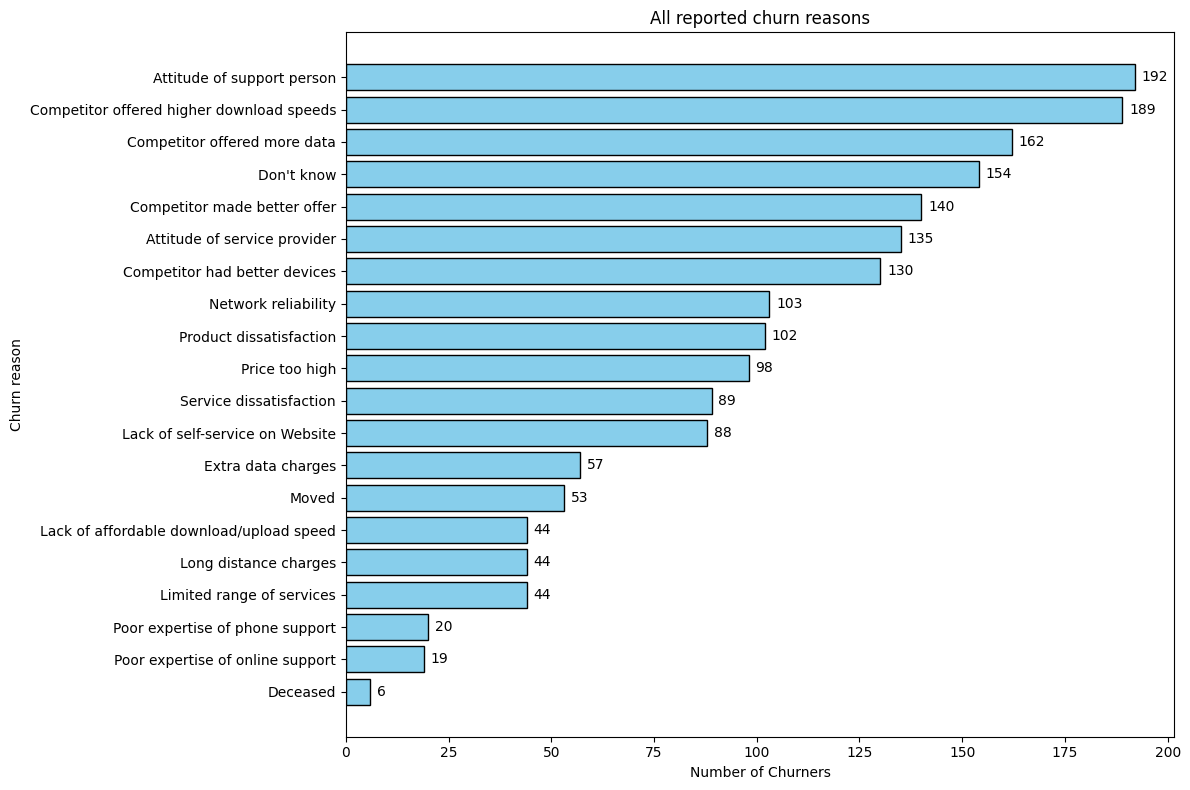

In [50]:
churn_reason_counts = df_clean['churn_reason'].value_counts().sort_values()

plt.figure(figsize=(12, 8))
bars = plt.barh(
    churn_reason_counts.index, 
    churn_reason_counts.values, 
    color='skyblue',
    edgecolor='black')
plt.bar_label(bars, fmt='%.0f', padding=5)
plt.title('All reported churn reasons')
plt.xlabel('Number of Churners')
plt.ylabel("Churn reason")
plt.tight_layout()
plt.show()

- The most common reason for churn is customer service quality: issues like the attitude of support staff and service provider behavior indicate a need to improve client interactions.
- Competitive offers strongly drive churn – many customers leave for better prices, devices, or higher internet speeds, so the company should actively monitor the market and adjust its offer.
- A notable share of customers don’t know why they left
---

### internet_service & payment_method

In [51]:
pivot = df_clean.pivot_table(
    index='internet_service',
    columns='payment_method',
    values='churn_value',
    aggfunc='mean'
)
pivot = (pivot * 100).round(2)
pivot


payment_method,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
internet_service,,,,
DSL,9.36,12.12,31.94,20.72
Fiber optic,28.95,25.29,53.23,42.64
No,5.42,2.72,12.30,9.58


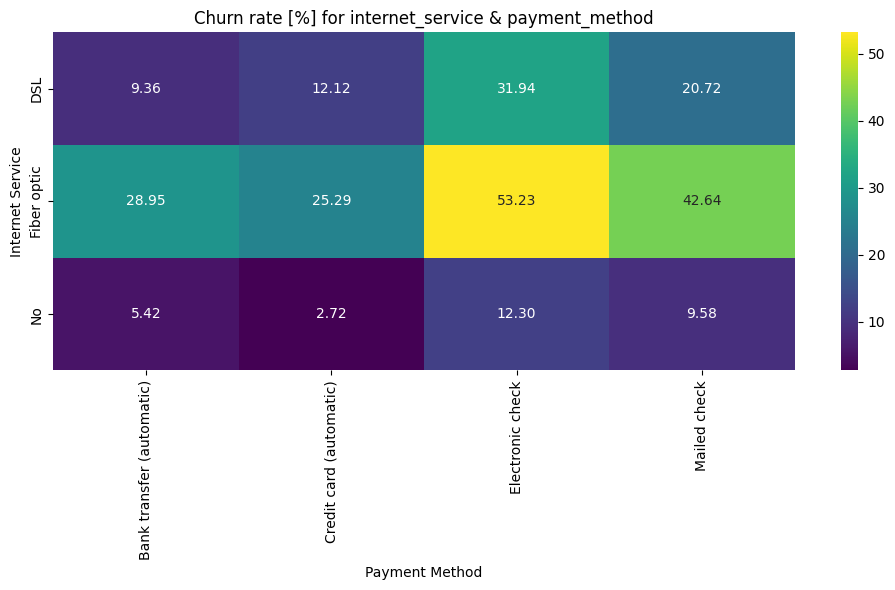

In [52]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title("Churn rate [%] for internet_service & payment_method")
plt.ylabel("Internet Service")
plt.xlabel("Payment Method")
plt.tight_layout()
plt.show()


- The highest churn rate (53%) is observed among Fiber optic customers paying via Electronic check.
- Automatic payments (Credit card, Bank transfer) reduce churn regardless of the internet type.
- Customers without internet service show the lowest churn, especially when using automatic payment methods.
- Internet type and payment method jointly have a strong impact on the risk of customer churn.

> ### Feature Engineering ? We can create new feature e.g. internet_service + payment_method
---

### contract & tenure_bin

In [53]:
pivot = df_clean.pivot_table(
    index='contract',
    columns='tenure_bin',
    values='churn_value',
    aggfunc='mean',
    observed=True
)
pivot = (pivot * 100).round(2)
pivot


tenure_bin,"(-0.072, 18.0]","(18.0, 36.0]","(36.0, 54.0]","(54.0, 72.0]"
contract,,,,
Month-to-month,49.54,32.92,33.26,22.37
One year,8.88,8.40,13.12,12.83
Two year,0.00,1.37,2.99,3.25


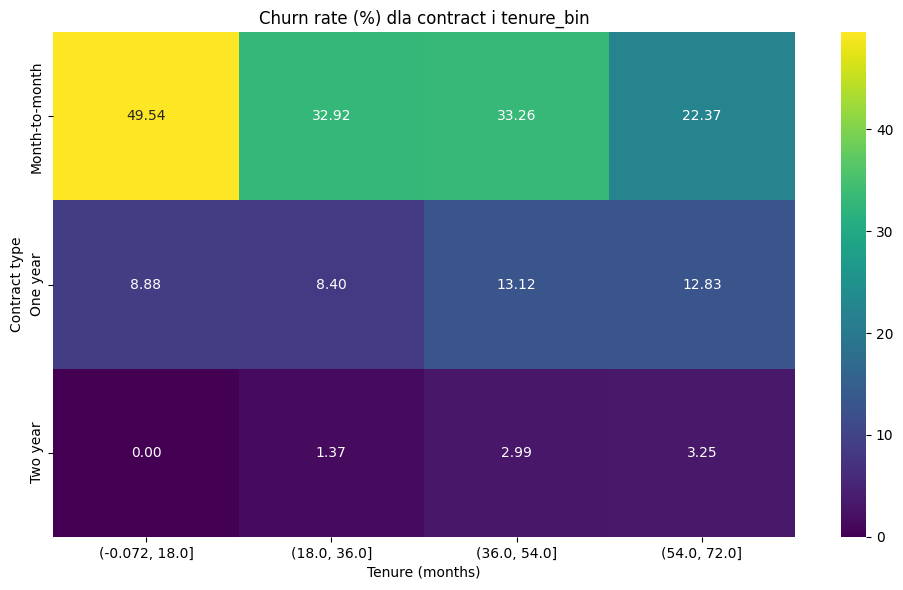

In [54]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title("Churn rate (%) dla contract i tenure_bin")
plt.xlabel("Tenure (months)")
plt.ylabel("Contract type")
plt.tight_layout()
plt.show()

- The highest churn rate (49.5%) is observed among new customers with month-to-month contracts (<18 months) - this is the highest-risk group.
- Churn among customers with one and two-year contracts is very low in some segments, it’s almost 0%.
- For customers on two-year contracts, churn never exceeds 3.3%, regardless of tenure.
- It’s clear that a short contract combined with short tenure = very high risk of churn.
---

### online_security & tech_supp

In [55]:
pivot = df_clean.pivot_table(
    index='online_security',
    columns='tech_support',
    values='churn_value',
    aggfunc='mean',
    observed=True
)
pivot = (pivot * 100).round(2)
pivot


tech_support,No,No internet service,Yes
online_security,,,
No,48.96,NaN,22.33
No internet service,NaN,7.4,NaN
Yes,21.30,NaN,9.01


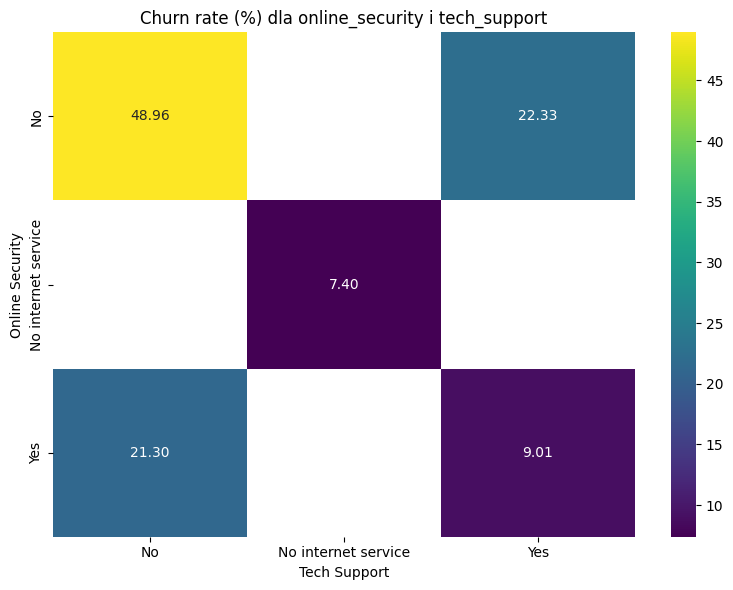

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title("Churn rate (%) dla online_security i tech_support")
plt.xlabel("Tech Support")
plt.ylabel("Online Security")
plt.tight_layout()
plt.show()

- The highest churn rate (48.96%) occurs when the customer does not use any of these services.
- When the customer uses only one of them, churn drops to around 21-22%.
- The lowest churn rate (9.01%) is observed among customers who use both services simultaneously.
- This shows that the combination of protection and technical support services strongly increases customer loyalty to the company.

In [57]:
df_clean['tenure_bin'] = df_clean['tenure_bin'].astype(str)
df_clean.to_parquet('../data/processed/Telco_customer_churn_ML.parquet')

# EDA SUMMARY
---
### Feature strategy for modeling
---
**Columns dropped** due to redundancy, lack of variance, or high cardinality:

- `customer_id` - unique identifier, no predictive value
- `churn_label` - duplicate of the target variable (`churn_value`)
- `churn_reason` - text feature with many missing values, NLP not in scope
- `count`, `country`, `state`, `city` – constant or irrelevant
- `zip_code`, `lat_long`, `latitude`, `longitude` - unstructured location data, not used in this model

```python
columns_to_drop = [
    'customer_id', 'count', 'country', 'state', 
    'city', 'zip_code', 'lat_long', 'latitude', 
    'longitude','churn_label', 'churn_reason'
]
```
---
**Feature Engineering**:
- `tenure_bins` - created by discretizing (binning) the variable tenure_months into 4 time intervals. (Type: categorical ('object'))
---
**Columns with type corrections**:
- `total_charges`: converted from `object` to `float` for numerical analysis
---

**Categorical features** (to be encoded):
- `gender`, `senior_citizen`, `partner`, `dependents`
- `phone_service`, `multiple_lines`
- `internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`
- `streaming_tv`, `streaming_movies`
- `contract`, `payment_method`

```python
categorical_features = [
    'gender', 'senior_citizen', 'partner', 'dependents',
    'phone_service', 'multiple_lines', 'internet_service',
    'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies',
    'contract', 'payment_method'
]
```
---
**Numerical features** (to be scaled):
- `tenure_months`, `monthly_charges`, `total_charges`, `cltv`, `churn_score`
```python
numerical_features = [
    'tenure_months', 'monthly_charges', 'total_charges', 'cltv', 'churn_score'
]
```
The cleaned dataset is saved in `.parquet` format to preserve data types and ensure efficient loading in the modeling phase.
